In [1]:
# Load libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

Reading Data

In [2]:
data = pd.read_csv("C:\\Users\\ydhav\\OneDrive - Auronova Consulting Solutions Private Limited\\Python_Practice\Liquiloans\\Data\\bank-additional\\bank-additional\\bank-additional-full.csv",sep =';')

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Checking for duplicates

In [7]:
data.duplicated().sum()

12

In [8]:
# dropping duplicate values

In [9]:
data = data.drop_duplicates()

In [10]:
data.shape

(41176, 21)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

Segregating columns as numeric , categorical and target 

In [12]:
num_cols = ["age","campaign","pdays","previous","emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m","nr.employed"]
cat_cols =["job","marital","education","default","housing","loan","contact","month","day_of_week","poutcome"]
target_cols =["y"]

In [13]:
num_cols

['age',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [14]:
cat_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [15]:
num_cols1 = num_cols.copy()
cat_cols1 = cat_cols.copy()

In [16]:
num_cols1

['age',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [17]:
cat_cols1 

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [18]:
num_cols1.append("y")
cat_cols1.append("y")

In [19]:
num_cols1

['age',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [20]:
cat_cols1

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [21]:
data['y'].value_counts()

no     36537
yes     4639
Name: y, dtype: int64

In [22]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [23]:
#checking for missing values in dataset
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

# Drop "duration" input feature

duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model


In [24]:
data = data.drop('duration',axis =1)

In [25]:
data.shape

(41176, 20)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  campaign        41176 non-null  int64  
 11  pdays           41176 non-null  int64  
 12  previous        41176 non-null  int64  
 13  poutcome        41176 non-null  object 
 14  emp.var.rate    41176 non-null  float64
 15  cons.price.idx  41176 non-null  float64
 16  cons.conf.idx   41176 non-null  float64
 17  euribor3m       41176 non-null 

Univariate Analysis

In [ ]:
# Histogram Plot 

<Axes: xlabel='nr.employed', ylabel='Count'>

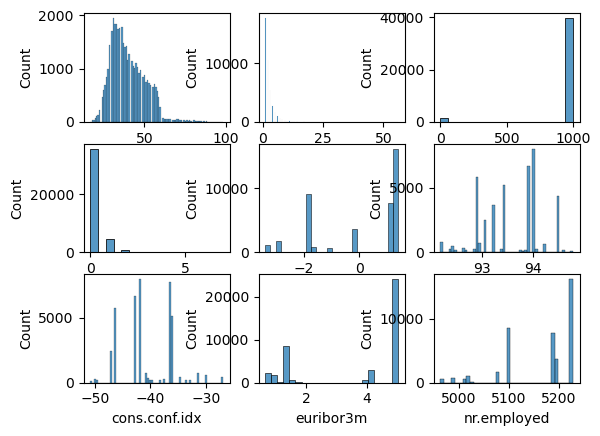

In [27]:
fig,axes =plt.subplots(3,3)
sns.histplot(data=data,x='age',ax=axes[0,0])
sns.histplot(data=data,x='campaign',ax=axes[0,1])
sns.histplot(data=data,x='pdays',ax=axes[0,2])
sns.histplot(data=data,x='previous',ax=axes[1,0])
sns.histplot(data=data,x='emp.var.rate',ax=axes[1,1])
sns.histplot(data=data,x='cons.price.idx',ax=axes[1,2])
sns.histplot(data=data,x='cons.conf.idx',ax=axes[2,0])
sns.histplot(data=data,x='euribor3m',ax=axes[2,1])
sns.histplot(data=data,x='nr.employed',ax=axes[2,2])

C:\Users\ydhav\AppData\Local\Temp\ipykernel_27316\2758743352.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'],ax=axes[0,0])
C:\Users\ydhav\AppData\Local\Temp\ipykernel_27316\2758743352.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['campaign'],ax=axes[0,1])
C:\Users\ydha

<Axes: xlabel='nr.employed', ylabel='Density'>

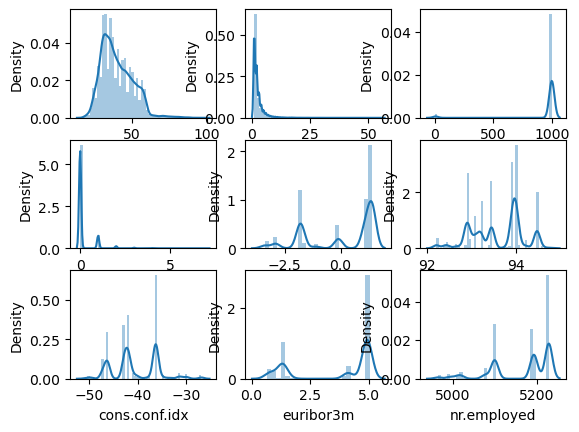

In [28]:
fig,axes =plt.subplots(3,3)
sns.distplot(data['age'],ax=axes[0,0])
sns.distplot(data['campaign'],ax=axes[0,1])
sns.distplot(data['pdays'],ax=axes[0,2])
sns.distplot(data['previous'],ax=axes[1,0])
sns.distplot(data['emp.var.rate'],ax=axes[1,1])
sns.distplot(data['cons.price.idx'],ax=axes[1,2])
sns.distplot(data['cons.conf.idx'],ax=axes[2,0])
sns.distplot(data['euribor3m'],ax=axes[2,1])
sns.distplot(data['nr.employed'],ax=axes[2,2])

<Axes: xlabel='nr.employed'>

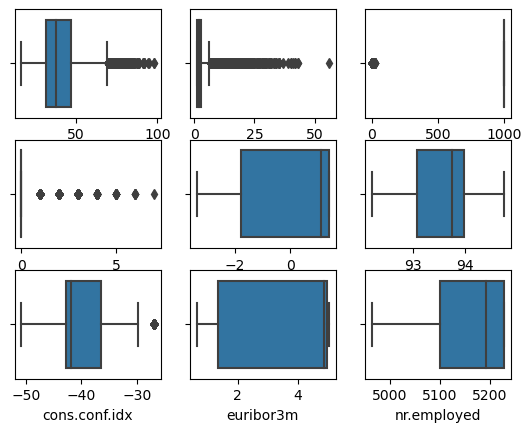

In [29]:
fig,axes =plt.subplots(3,3)
sns.boxplot(data=data,x='age',ax=axes[0,0])
sns.boxplot(data=data,x='campaign',ax=axes[0,1])
sns.boxplot(data=data,x='pdays',ax=axes[0,2])
sns.boxplot(data=data,x='previous',ax=axes[1,0])
sns.boxplot(data=data,x='emp.var.rate',ax=axes[1,1])
sns.boxplot(data=data,x='cons.price.idx',ax=axes[1,2])
sns.boxplot(data=data,x='cons.conf.idx',ax=axes[2,0])
sns.boxplot(data=data,x='euribor3m',ax=axes[2,1])
sns.boxplot(data=data,x='nr.employed',ax=axes[2,2])

Analysis of dependent variable - y 

In [30]:
#Frequency of 'y'
data['y'].value_counts()

no     36537
yes     4639
Name: y, dtype: int64

<Axes: xlabel='y', ylabel='count'>

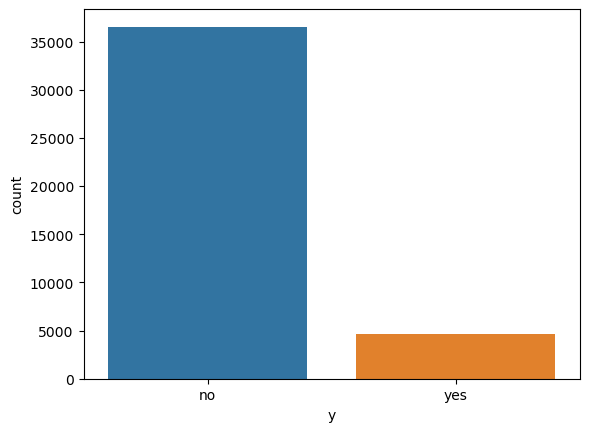

In [31]:
# Plotting the 'subscribed' frequency
sns.countplot(data=data,x='y')

In [32]:
#Normalizing the frequency table of 'y' variable
data['y'].value_counts(normalize=True)

no     0.887337
yes    0.112663
Name: y, dtype: float64

Analysing the 'Job' variable

In [33]:
#Frequency table
data['job'].value_counts()

admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

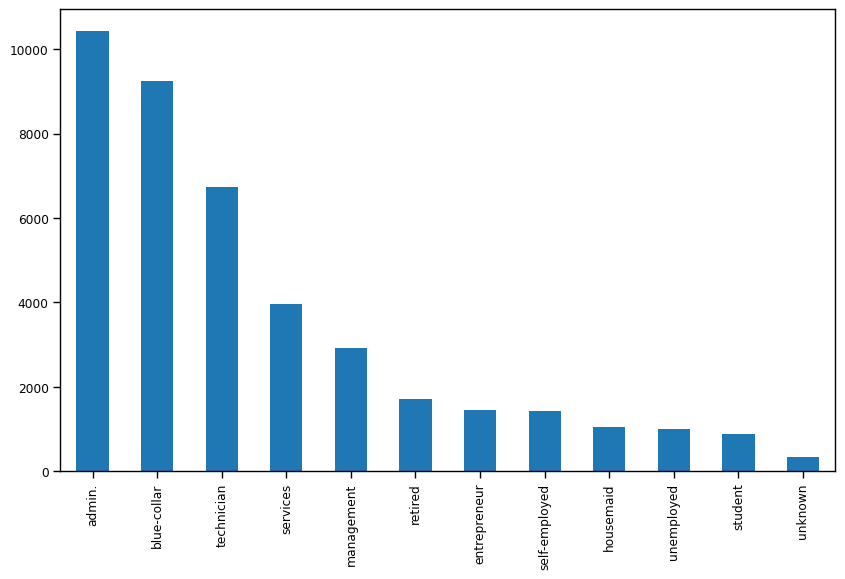

In [34]:
# Plotting the job frequency table
sns.set_context('paper')
data['job'].value_counts().plot(kind='bar', figsize=(10,6));

<Axes: xlabel='count', ylabel='job'>

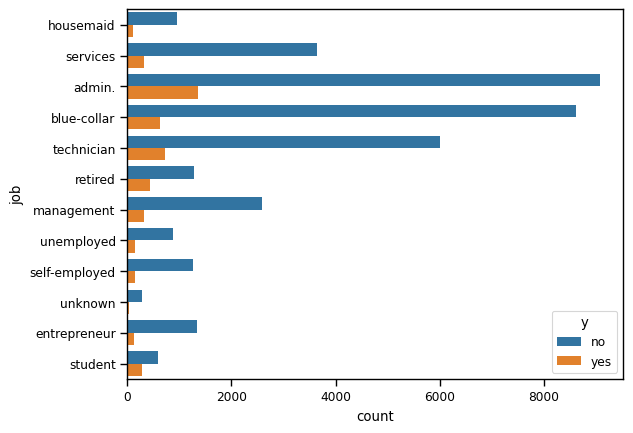

In [36]:
sns.countplot(data=data, y="job", hue="y")

Analysing Marital variable

<Axes: xlabel='count', ylabel='marital'>

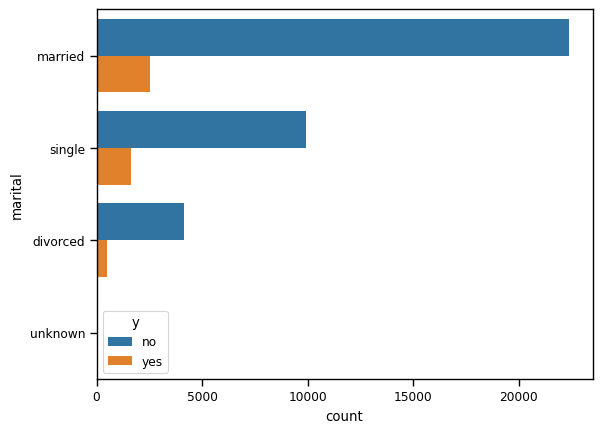

In [37]:
sns.countplot(data=data, y="marital", hue="y")

<Axes: xlabel='marital', ylabel='count'>

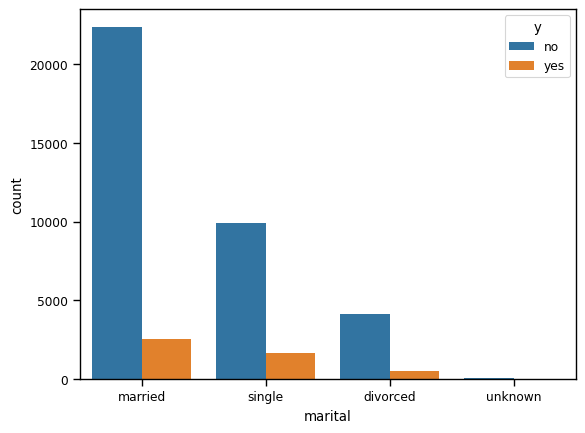

In [38]:
sns.countplot(data=data, x="marital", hue="y")

Analysing Education variable

<Axes: xlabel='count', ylabel='education'>

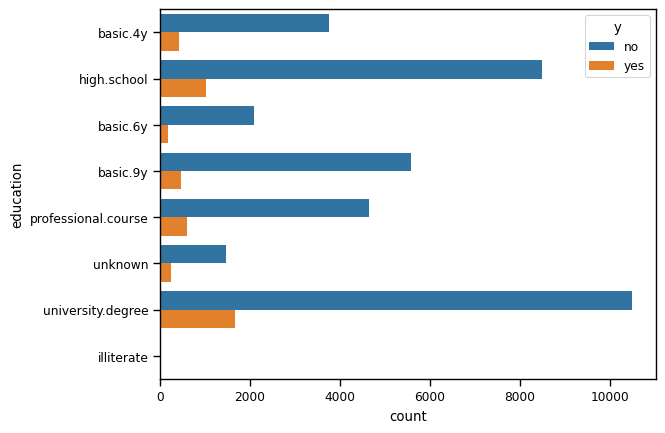

In [39]:
sns.countplot(data=data, y="education", hue="y")

<Axes: xlabel='count', ylabel='default'>

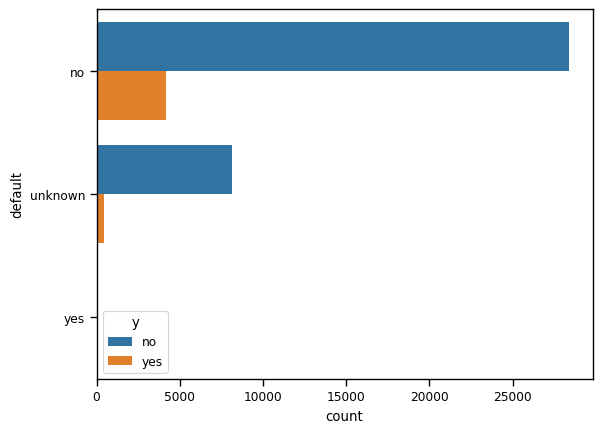

In [40]:
sns.countplot(data=data, y="default", hue="y")

Analysing Housing variable 

<Axes: xlabel='count', ylabel='housing'>

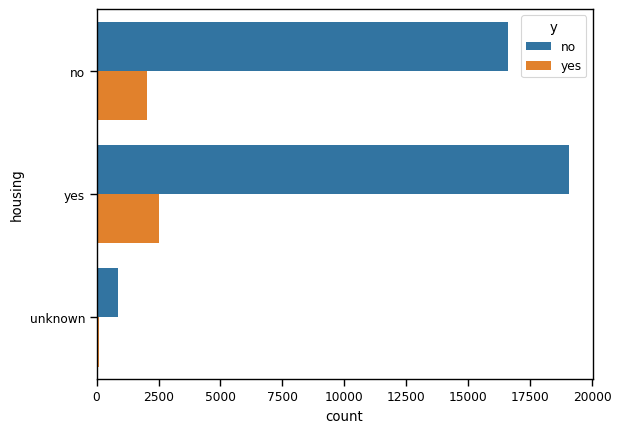

In [42]:
sns.countplot(data=data, y="housing", hue="y")

Analysing loan variable 

<Axes: xlabel='count', ylabel='loan'>

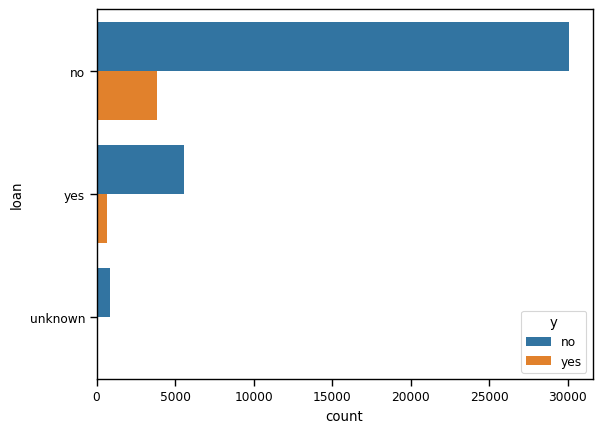

In [43]:
sns.countplot(data=data, y="loan", hue="y")

Analysing contact variable

<Axes: xlabel='count', ylabel='contact'>

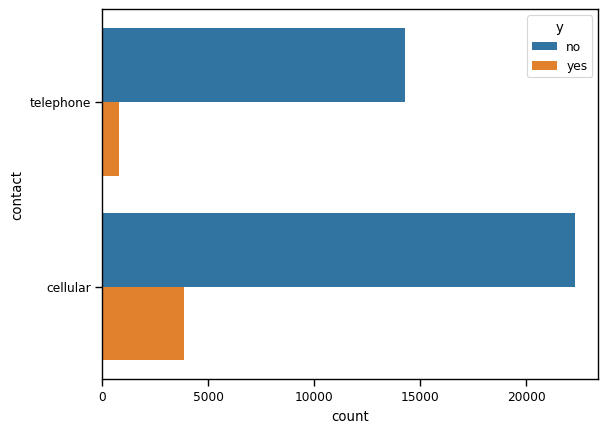

In [44]:
sns.countplot(data=data, y="contact", hue="y")

Analysing month variable

<Axes: xlabel='count', ylabel='month'>

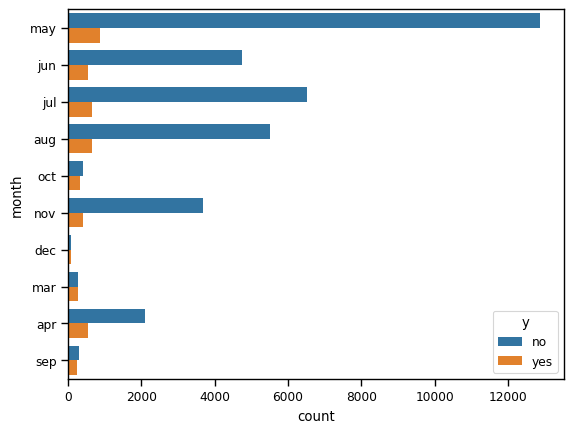

In [45]:
sns.countplot(data=data, y="month", hue="y")

Analysing day_of_week variable 

<Axes: xlabel='count', ylabel='day_of_week'>

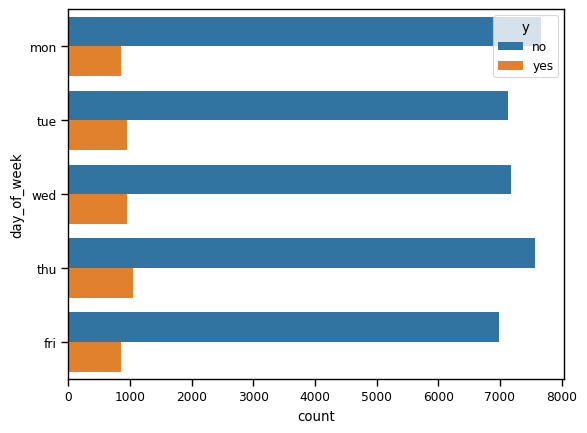

In [46]:
sns.countplot(data=data, y="day_of_week", hue="y")

Analysing poutcome variable

<Axes: xlabel='count', ylabel='poutcome'>

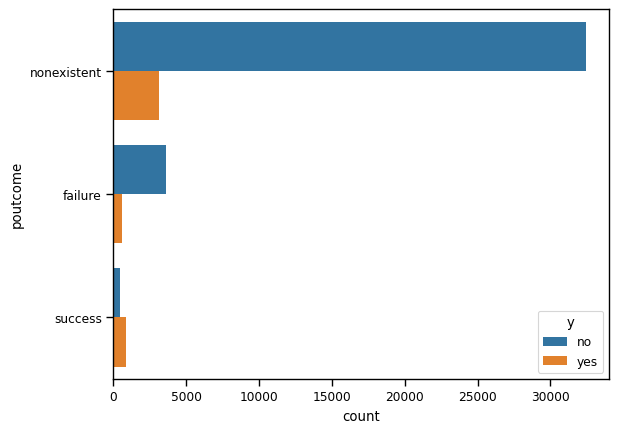

In [47]:
sns.countplot(data=data, y="poutcome", hue="y")

Input Categorical feature Observation
Job - More Job types are Admin , Technician and blue-collor and it means bank targeting high salaried people.
2)Marital - more people of type married

3)Education - more count in university.degree people . of course High salaried people should have university degree
expected. And illiterate count is very less.

4) default - most people have no credit default ,which means they can be approched .

5) housing - we must give more importance to people who have not taken any housing loan.

6)loan - we must give more importance to people who have not taken any loan.

7) month - Seems May is busy season

8) Day_of_week - Seems every day is busy but not on weekends.

9) p_outcome -outcome of the previous marketing campaign- Success is small rate. 

In [48]:
# Converting the target variables into 0s and 1s
data['y'].replace('no', 0,inplace=True)
data['y'].replace('yes', 1,inplace=True)

# Function to calculate IV and WOE for numerical variables 

In [49]:
def iv_woe(data, target, bins=40, show_woe=True):
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns

    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc'):
            d0 = pd.DataFrame({'x':data[ivars], 'decile': pd.qcut(data[ivars], bins, duplicates='drop') , 'y': data[target]})
              
        else:
            d0 = pd.DataFrame({'x':data[ivars], 'decile': data[ivars], 'y': data[target]})
        
        d0['decile'] = np.where(d0['x'] == -555555, '-555555' ,d0['decile'])
        d = d0.groupby('decile', as_index= False).agg({"y": ["count", "sum"]})
        d3 = d0.assign(Min = d0['x'], Max = d0['x']).groupby('decile', as_index= False).agg({"Min": 'min', "Max":'max'})
        
        d.columns = ['decile', 'N', 'subscr']
        d['pop_perc'] = (d['N']/d['N'].sum())*100
        d['subscr_perc'] = d['subscr'] / d['subscr'].sum()
        d['n_subscr'] = d['N'] - d['subscr']
        d['n_subscr_perc'] = d['n_subscr']/ d['n_subscr'].sum()
        d['subscr_rate'] =  (d['subscr']/d['N'])*100
        d['woe'] = np.log(d['n_subscr_perc']/d['subscr_perc'])
        d['diff_n_subscr_subscr_perc'] = d['n_subscr_perc'] - d['subscr_perc']
        d['contribution'] = d['woe'] * d['diff_n_subscr_subscr_perc']
        d['IV'] = d['contribution'].sum()
        
        d.insert(loc=0, column='Variable', value=ivars)
        d4 = pd.merge(left=d, right=d3,on = 'decile', how='left')
        
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d4['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d4], axis=0)
        woeDF.sort_values(['Variable','Max'], inplace = True)
        woeDF = woeDF[['Variable','decile','subscr','n_subscr','Min','Max','pop_perc','subscr_rate','woe','contribution','IV']]


        #Show WOE Table
        if show_woe == True:
            print(d4)
    return newDF, woeDF

# Function to calculate IV and WOE for categorical or integer variables

In [50]:
def iv_woe1(data, target, show_woe=True):
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()

    #Extract Column Names
    cols = data.columns

    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:

        d0 = pd.DataFrame({'x':data[ivars], 'decile': data[ivars], 'y': data[target]})
        
        d0['decile'] = np.where(d0['x'] == -555555, '-555555' ,d0['decile'])
        d = d0.groupby('decile', as_index= False).agg({"y": ["count", "sum"]})
        d3 = d0.assign(Min = d0['x'], Max = d0['x']).groupby('decile', as_index= False).agg({"Min": 'min', "Max":'max'})
        
        d.columns = ['decile', 'N', 'subscr']
        d['pop_perc'] = (d['N']/d['N'].sum())*100
        d['subscr_perc'] = d['subscr'] / d['subscr'].sum()
        d['n_subscr'] = d['N'] - d['subscr']
        d['n_subscr_perc'] = d['n_subscr']/ d['n_subscr'].sum()
        d['subscr_rate'] =  (d['subscr']/d['N'])*100
        d['woe'] = np.log(d['n_subscr_perc']/d['subscr_perc'])
        d['diff_n_subscr_subscr_perc'] = d['n_subscr_perc'] - d['subscr_perc']
        d['contribution'] = d['woe'] * d['diff_n_subscr_subscr_perc']
        d['IV'] = d['contribution'].sum()
        
        d.insert(loc=0, column='Variable', value=ivars)
        d4 = pd.merge(left=d, right=d3,on = 'decile', how='left')
        
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d4['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d4], axis=0)
        woeDF.sort_values(['Variable','Max'], inplace = True)
        woeDF = woeDF[['Variable','decile','subscr','n_subscr','Min','Max','pop_perc','subscr_rate','woe','contribution','IV']]


        #Show WOE Table
        if show_woe == True:
            print(d4)
    return newDF, woeDF

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  campaign        41176 non-null  int64  
 11  pdays           41176 non-null  int64  
 12  previous        41176 non-null  int64  
 13  poutcome        41176 non-null  object 
 14  emp.var.rate    41176 non-null  float64
 15  cons.price.idx  41176 non-null  float64
 16  cons.conf.idx   41176 non-null  float64
 17  euribor3m       41176 non-null 

# Splitting data into training and testing 

In [52]:
data.shape

(41176, 20)

In [ ]:
# Select Features 

In [53]:
feature = data.drop('y',axis =1)

In [54]:
feature.shape

(41176, 19)

In [55]:
#Select Target 

In [56]:
target =data['y']

In [57]:
target.shape

(41176,)

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
train,test = train_test_split(data,random_state=100,stratify= data['y'],test_size =0.30)

In [60]:
train.shape

(28823, 20)

In [61]:
test.shape

(12353, 20)

In [62]:
X_train = train.loc[:, train.columns != 'y']

In [63]:
X_train.shape

(28823, 19)

In [64]:
X_test = test.loc[:, test.columns != 'y']

In [65]:
X_test.shape

(12353, 19)

In [66]:
y_train = train.loc[:, train.columns == 'y']

In [67]:
y_train.shape

(28823, 1)

In [68]:
y_train

,y
22708,0
28573,0
9537,0
8441,0
1358,0
...,...
15812,0
34049,0
3097,0
26234,0


In [69]:
y_test = test.loc[:, test.columns == 'y']

In [70]:
y_test.shape

(12353, 1)

In [71]:
def cal_subscr_rate(col):
    subscr_rate = str((col.sum() / col.count())*100)
    print('Subscr rate is : ' + subscr_rate )
    print(col.value_counts())

In [72]:
cal_subscr_rate(y_train)

Subscr rate is : y    11.265309
dtype: float64
y
0    25576
1     3247
dtype: int64


<Axes: xlabel='y', ylabel='count'>

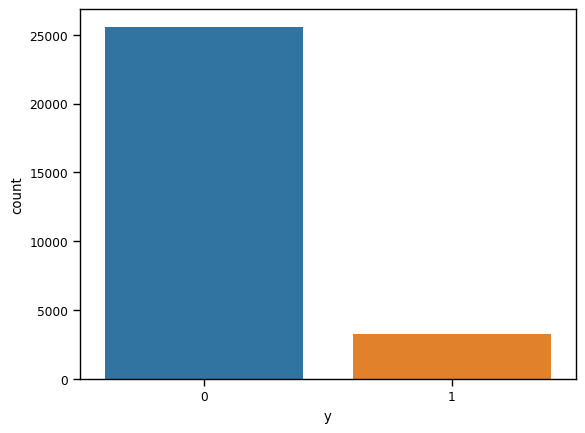

In [74]:
# Plotting the 'subscribed' frequency train
sns.countplot(data=y_train,x='y')

In [73]:
cal_subscr_rate(y_test)

Subscr rate is : y    11.268518
dtype: float64
y
0    10961
1     1392
dtype: int64


<Axes: xlabel='y', ylabel='count'>

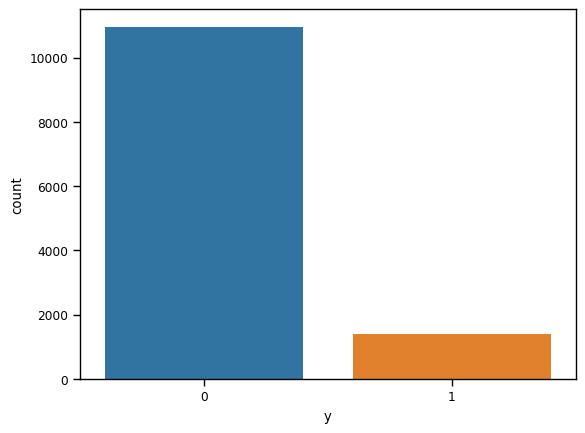

In [75]:
sns.countplot(data=y_test,x='y')

In [79]:
# Checking for correlated features 

In [76]:
train_corr = X_train.corr()
train_corr

C:\Users\ydhav\AppData\Local\Temp\ipykernel_27316\333941241.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_corr = X_train.corr()


,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,0.011563,-0.027557,0.013425,0.012048,0.010469,0.131468,0.024267,-0.004076
campaign,0.011563,1.000000,0.054564,-0.083471,0.154447,0.134236,-0.010228,0.137995,0.145802
pdays,-0.027557,0.054564,1.000000,-0.584357,0.273343,0.086485,-0.100945,0.297429,0.371700
previous,0.013425,-0.083471,-0.584357,1.000000,-0.422099,-0.207696,-0.046548,-0.455160,-0.501615
emp.var.rate,0.012048,0.154447,0.273343,-0.422099,1.000000,0.777340,0.198867,0.972181,0.907006
cons.price.idx,0.010469,0.134236,0.086485,-0.207696,0.777340,1.000000,0.065444,0.690734,0.525476
cons.conf.idx,0.131468,-0.010228,-0.100945,-0.046548,0.198867,0.065444,1.000000,0.279808,0.100124
euribor3m,0.024267,0.137995,0.297429,-0.455160,0.972181,0.690734,0.279808,1.000000,0.945119
nr.employed,-0.004076,0.145802,0.371700,-0.501615,0.907006,0.525476,0.100124,0.945119,1.000000


<Axes: >

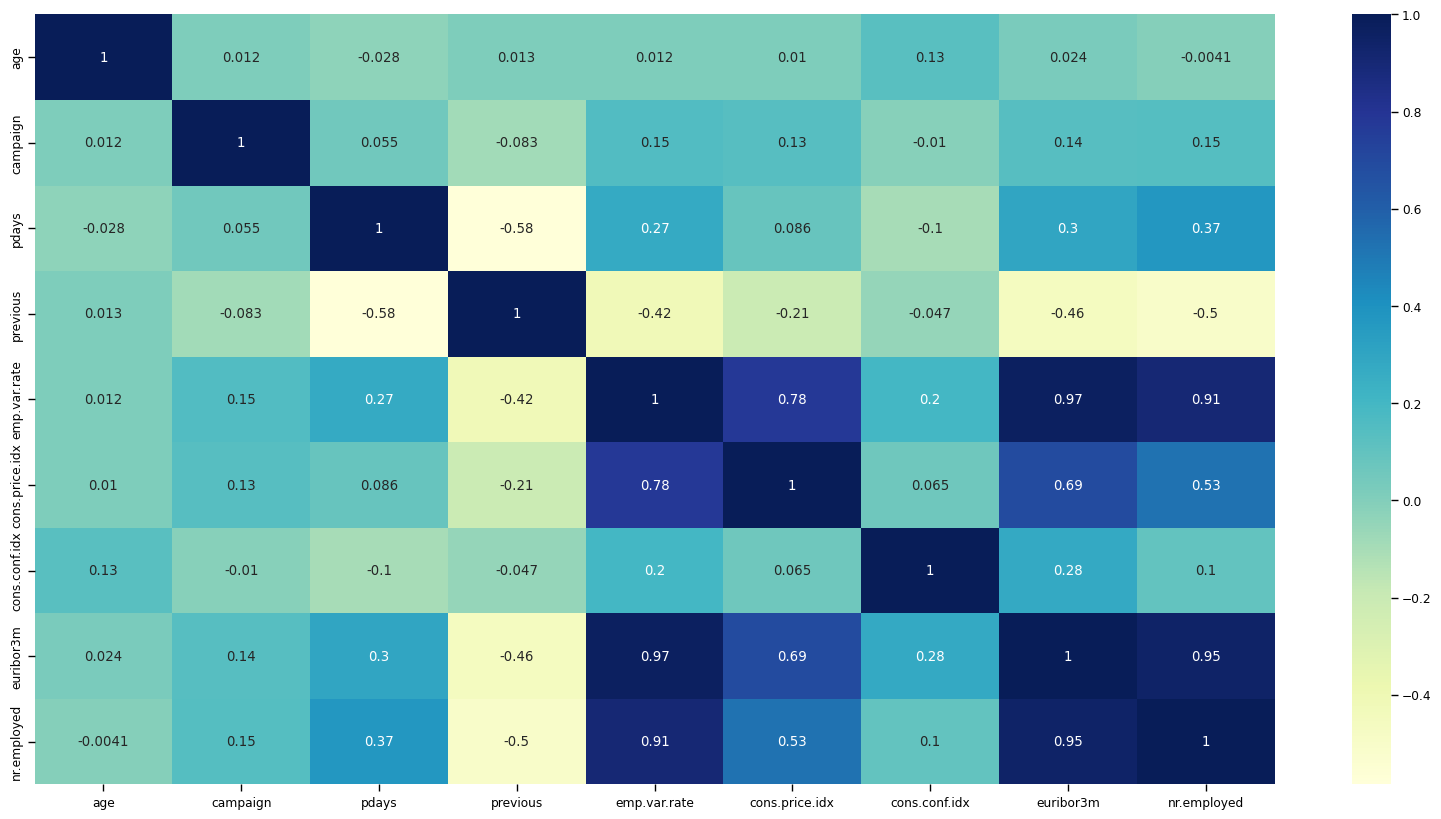

In [77]:
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(train_corr, annot=True, cmap='YlGnBu')

In [80]:
# Calculating IV and WOE to check which features have better predictive power 

In [78]:
iv, woe = iv_woe(data = train[num_cols1] , target ='y', bins=40, show_woe = False)

In [81]:
iv

,Variable,IV
0,age,8.499272
0,campaign,0.465540
0,pdays,0.836248
0,previous,0.666323
0,emp.var.rate,7.495374
0,cons.price.idx,10.557510
0,cons.conf.idx,10.664012
0,euribor3m,41.886189
0,nr.employed,8.407455


In [82]:
woe

,Variable,decile,subscr,n_subscr,Min,Max,pop_perc,subscr_rate,woe,contribution,IV
0,age,"(16.999, 24.0]",200,562,17.0,24.0,2.643722,26.246719,-1.030738,0.040839,0.257554
1,age,"(24.0, 26.0]",152,744,25.0,26.0,3.108629,16.964286,-0.475762,0.008432,0.257554
2,age,"(26.0, 27.0]",75,507,27.0,27.0,2.019221,12.886598,-0.152900,0.000501,0.257554
3,age,"(27.0, 28.0]",108,590,28.0,28.0,2.421677,15.472779,-0.365932,0.003730,0.257554
4,age,"(28.0, 29.0]",132,886,29.0,29.0,3.531902,12.966601,-0.160008,0.000962,0.257554
...,...,...,...,...,...,...,...,...,...,...,...
0,pdays,"(-0.001, 6.0]",513,277,0.0,6.0,2.740867,64.936709,-2.680181,0.394420,0.418124
1,pdays,"(6.0, 999.0]",2734,25299,7.0,999.0,97.259133,9.752791,0.161076,0.023704,0.418124
0,previous,"(-0.001, 1.0]",2874,25207,0.0,1.0,97.425667,10.234678,0.107494,0.010798,0.222108
1,previous,"(1.0, 2.0]",250,282,2.0,2.0,1.845748,46.992481,-1.943477,0.128208,0.222108


In [83]:
iv1, woe1 = iv_woe1(data = train[cat_cols1] , target ='y', show_woe = False)

In [84]:
iv1

,Variable,IV
0,job,2.359236
0,marital,0.145189
0,education,0.456300
0,default,inf
0,housing,0.005611
0,loan,0.000488
0,contact,0.520883
0,month,4.961975
0,day_of_week,0.040073
0,poutcome,1.642799


In [85]:
woe1

,Variable,decile,subscr,n_subscr,Min,Max,pop_perc,subscr_rate,woe,contribution,IV
0,contact,cellular,2703,15561,cellular,cellular,63.366062,14.799606,-0.313517,0.070240,0.260442
1,contact,telephone,544,10015,telephone,telephone,36.633938,5.152003,0.848967,0.190202,0.260442
0,day_of_week,fri,602,4898,fri,fri,19.081983,10.945455,0.032402,0.000198,0.008015
1,day_of_week,mon,583,5402,mon,mon,20.764667,9.741019,0.162414,0.005143,0.008015
2,day_of_week,thu,745,5361,thu,thu,21.184471,12.201114,-0.090401,0.001793,0.008015
3,day_of_week,tue,662,4918,tue,tue,19.359539,11.863799,-0.058531,0.000678,0.008015
4,day_of_week,wed,655,4997,wed,wed,19.609340,11.588818,-0.031965,0.000203,0.008015
0,default,no,2949,19779,no,no,78.853693,12.975185,-0.160768,0.021685,inf
1,default,unknown,298,5794,unknown,unknown,21.135898,4.891661,0.903562,0.121767,inf
2,default,yes,0,3,yes,yes,0.010408,0.000000,inf,inf,inf


In [87]:
frames = [iv, iv1]
 
iv_all = pd.concat(frames,axis =0)

In [88]:
iv_all

,Variable,IV
0,age,8.499272
0,campaign,0.465540
0,pdays,0.836248
0,previous,0.666323
0,emp.var.rate,7.495374
0,cons.price.idx,10.557510
0,cons.conf.idx,10.664012
0,euribor3m,41.886189
0,nr.employed,8.407455
0,job,2.359236


In [89]:
iv_all.sort_values(by = 'IV',ascending=False,inplace=True)

In [90]:
iv_all

,Variable,IV
0,default,inf
0,euribor3m,41.886189
0,cons.conf.idx,10.664012
0,cons.price.idx,10.557510
0,age,8.499272
0,nr.employed,8.407455
0,emp.var.rate,7.495374
0,month,4.961975
0,job,2.359236
0,poutcome,1.642799


In [92]:
# Dropping correlated features and keeping one with high IV values 

In [93]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28823 entries, 22708 to 34052
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             28823 non-null  int64  
 1   job             28823 non-null  object 
 2   marital         28823 non-null  object 
 3   education       28823 non-null  object 
 4   default         28823 non-null  object 
 5   housing         28823 non-null  object 
 6   loan            28823 non-null  object 
 7   contact         28823 non-null  object 
 8   month           28823 non-null  object 
 9   day_of_week     28823 non-null  object 
 10  campaign        28823 non-null  int64  
 11  pdays           28823 non-null  int64  
 12  previous        28823 non-null  int64  
 13  poutcome        28823 non-null  object 
 14  emp.var.rate    28823 non-null  float64
 15  cons.price.idx  28823 non-null  float64
 16  cons.conf.idx   28823 non-null  float64
 17  euribor3m       28823 non-n

In [94]:
X_train = X_train.drop(['cons.price.idx','nr.employed','emp.var.rate'],axis =1)

In [95]:
# Dropping features with IV <0.02 and default feature as it has less proportion of yes counts 

In [96]:
X_train = X_train.drop(['default','housing','loan'],axis =1)

In [97]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28823 entries, 22708 to 34052
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            28823 non-null  int64  
 1   job            28823 non-null  object 
 2   marital        28823 non-null  object 
 3   education      28823 non-null  object 
 4   contact        28823 non-null  object 
 5   month          28823 non-null  object 
 6   day_of_week    28823 non-null  object 
 7   campaign       28823 non-null  int64  
 8   pdays          28823 non-null  int64  
 9   previous       28823 non-null  int64  
 10  poutcome       28823 non-null  object 
 11  cons.conf.idx  28823 non-null  float64
 12  euribor3m      28823 non-null  float64
dtypes: float64(2), int64(4), object(7)
memory usage: 3.1+ MB


In [98]:
# Dropping the features in test as well 

In [99]:
X_test = X_test.drop(['cons.price.idx','nr.employed','emp.var.rate'],axis =1)

In [100]:
X_test = X_test.drop(['default','housing','loan'],axis =1)

In [101]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12353 entries, 22377 to 30680
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            12353 non-null  int64  
 1   job            12353 non-null  object 
 2   marital        12353 non-null  object 
 3   education      12353 non-null  object 
 4   contact        12353 non-null  object 
 5   month          12353 non-null  object 
 6   day_of_week    12353 non-null  object 
 7   campaign       12353 non-null  int64  
 8   pdays          12353 non-null  int64  
 9   previous       12353 non-null  int64  
 10  poutcome       12353 non-null  object 
 11  cons.conf.idx  12353 non-null  float64
 12  euribor3m      12353 non-null  float64
dtypes: float64(2), int64(4), object(7)
memory usage: 1.3+ MB


In [102]:
# Standardizing the data 

In [103]:
scaler = StandardScaler()
X_train[X_train.columns[X_train.columns.isin(num_cols)]] = scaler.fit_transform(X_train[X_train.columns[X_train.columns.isin(num_cols)]])
X_test[X_test.columns[X_test.columns.isin(num_cols)]] = scaler.fit_transform(X_test[X_test.columns[X_test.columns.isin(num_cols)]])


In [104]:
X_train

,age,job,marital,education,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.conf.idx,euribor3m
22708,-0.095828,admin.,married,professional.course,cellular,aug,fri,0.155268,0.196256,-0.351218,nonexistent,0.957390,0.775514
28573,-1.835341,admin.,single,high.school,cellular,apr,wed,-0.564349,0.196256,-0.351218,nonexistent,-1.424419,-1.270289
9537,0.290730,technician,divorced,professional.course,telephone,jun,mon,0.155268,0.196256,-0.351218,nonexistent,-0.276820,0.773784
8441,-0.965584,admin.,single,high.school,telephone,jun,tue,-0.204540,0.196256,-0.351218,nonexistent,-0.276820,0.717869
1358,0.097451,admin.,married,basic.9y,telephone,may,thu,-0.564349,0.196256,-0.351218,nonexistent,0.892432,0.712681
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15812,1.547045,housemaid,divorced,basic.4y,cellular,jul,mon,-0.204540,0.196256,-0.351218,nonexistent,-0.471695,0.773208
34049,-0.579026,admin.,single,high.school,cellular,may,wed,-0.204540,0.196256,1.665748,failure,-1.229544,-1.347533
3097,1.933603,unknown,married,university.degree,telephone,may,thu,-0.564349,0.196256,-0.351218,nonexistent,0.892432,0.715563
26234,0.000811,services,single,basic.6y,cellular,nov,thu,-0.564349,0.196256,-0.351218,nonexistent,-0.320126,0.263630


In [105]:
X_test

,age,job,marital,education,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.conf.idx,euribor3m
22377,1.690671,retired,married,basic.4y,cellular,aug,fri,-0.569796,0.193537,-0.345652,nonexistent,0.937570,0.770990
22736,-0.481569,management,divorced,university.degree,cellular,aug,mon,1.612629,0.193537,-0.345652,nonexistent,0.937570,0.771566
33023,0.368438,technician,married,professional.course,cellular,may,mon,-0.206058,0.193537,-0.345652,nonexistent,-1.234695,-1.343143
20815,1.785116,retired,married,university.degree,cellular,aug,wed,0.157679,0.193537,-0.345652,nonexistent,0.937570,0.771566
25924,0.085102,admin.,married,university.degree,telephone,nov,wed,-0.569796,0.193537,-0.345652,nonexistent,-0.331377,0.284133
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36143,2.635123,retired,married,university.degree,cellular,may,wed,-0.206058,0.193537,-0.345652,nonexistent,-1.234695,-1.359872
29846,-0.481569,admin.,single,basic.9y,cellular,apr,mon,-0.206058,0.193537,-0.345652,nonexistent,-1.428263,-1.281998
25917,0.651774,admin.,married,university.degree,cellular,nov,wed,-0.569796,0.193537,1.682774,failure,-0.331377,0.284133
11741,0.179548,housemaid,married,basic.4y,telephone,jun,fri,1.976367,0.193537,-0.345652,nonexistent,-0.288361,0.768105


In [106]:
cat_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [107]:
cat_cols.remove("default")
cat_cols.remove("housing")
cat_cols.remove("loan")

In [108]:
cat_cols

['job', 'marital', 'education', 'contact', 'month', 'day_of_week', 'poutcome']

In [109]:
X_train = pd.get_dummies(X_train,columns= cat_cols)
X_test =  pd.get_dummies(X_test,columns= cat_cols)

In [110]:
X_train

,age,campaign,pdays,previous,cons.conf.idx,euribor3m,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
22708,-0.095828,0.155268,0.196256,-0.351218,0.957390,0.775514,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
28573,-1.835341,-0.564349,0.196256,-0.351218,-1.424419,-1.270289,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
9537,0.290730,0.155268,0.196256,-0.351218,-0.276820,0.773784,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
8441,-0.965584,-0.204540,0.196256,-0.351218,-0.276820,0.717869,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1358,0.097451,-0.564349,0.196256,-0.351218,0.892432,0.712681,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15812,1.547045,-0.204540,0.196256,-0.351218,-0.471695,0.773208,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
34049,-0.579026,-0.204540,0.196256,1.665748,-1.229544,-1.347533,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3097,1.933603,-0.564349,0.196256,-0.351218,0.892432,0.715563,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
26234,0.000811,-0.564349,0.196256,-0.351218,-0.320126,0.263630,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [111]:
X_test

,age,campaign,pdays,previous,cons.conf.idx,euribor3m,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
22377,1.690671,-0.569796,0.193537,-0.345652,0.937570,0.770990,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
22736,-0.481569,1.612629,0.193537,-0.345652,0.937570,0.771566,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
33023,0.368438,-0.206058,0.193537,-0.345652,-1.234695,-1.343143,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
20815,1.785116,0.157679,0.193537,-0.345652,0.937570,0.771566,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
25924,0.085102,-0.569796,0.193537,-0.345652,-0.331377,0.284133,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36143,2.635123,-0.206058,0.193537,-0.345652,-1.234695,-1.359872,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
29846,-0.481569,-0.206058,0.193537,-0.345652,-1.428263,-1.281998,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
25917,0.651774,-0.569796,0.193537,1.682774,-0.331377,0.284133,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
11741,0.179548,1.976367,0.193537,-0.345652,-0.288361,0.768105,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [112]:
X_train.columns

Index(['age', 'campaign', 'pdays', 'previous', 'cons.conf.idx', 'euribor3m',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success'],
      dtype='object

In [113]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28823 entries, 22708 to 34052
Data columns (total 50 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            28823 non-null  float64
 1   campaign                       28823 non-null  float64
 2   pdays                          28823 non-null  float64
 3   previous                       28823 non-null  float64
 4   cons.conf.idx                  28823 non-null  float64
 5   euribor3m                      28823 non-null  float64
 6   job_admin.                     28823 non-null  uint8  
 7   job_blue-collar                28823 non-null  uint8  
 8   job_entrepreneur               28823 non-null  uint8  
 9   job_housemaid                  28823 non-null  uint8  
 10  job_management                 28823 non-null  uint8  
 11  job_retired                    28823 non-null  uint8  
 12  job_self-employed              28823 non-n

In [114]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12353 entries, 22377 to 30680
Data columns (total 50 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            12353 non-null  float64
 1   campaign                       12353 non-null  float64
 2   pdays                          12353 non-null  float64
 3   previous                       12353 non-null  float64
 4   cons.conf.idx                  12353 non-null  float64
 5   euribor3m                      12353 non-null  float64
 6   job_admin.                     12353 non-null  uint8  
 7   job_blue-collar                12353 non-null  uint8  
 8   job_entrepreneur               12353 non-null  uint8  
 9   job_housemaid                  12353 non-null  uint8  
 10  job_management                 12353 non-null  uint8  
 11  job_retired                    12353 non-null  uint8  
 12  job_self-employed              12353 non-n

In [116]:
# Function to evaluate model performance on test data 

In [115]:
def evaluate_model(model,x_test,y_test) :
    from sklearn import metrics
    
    # Predict test data 
    y_pred = model.predict(x_test)
    
    # Calculate accuracy ,precision , recall ,f1 score 
    
    acc = metrics.accuracy_score(y_test,y_pred)
    prec = metrics.precision_score(y_test,y_pred)
    rec = metrics.recall_score(y_test,y_pred)
    f1 = metrics.f1_score(y_test,y_pred)
    
    # calculate area under the curve (AUC)
    
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr,tpr,_ = metrics.roc_curve(y_test,y_pred_proba)
    auc = metrics.roc_auc_score(y_test,y_pred_proba)
    
    # Display confusion matrix
    cm = metrics.confusion_matrix(y_test,y_pred)
    
    # Visualization of confusion matrix
    sns.heatmap(cm/np.sum(cm),annot = True, fmt ='.2%',cmap ='Blues')
    
    return {'acc':acc,'prec':prec,'rec':rec,'f1':f1,
           'fpr':fpr,'tpr':tpr,'auc':auc,'cm':cm}

# Modelling using Random Forest

In [118]:
# Random Forest 

In [117]:
# Randomized Search CV for Hyperparameter Tuning and get optimal parameters for model building 

In [119]:
# Number of trees in random forest
n_estimators = [50,100]

# Number of features to consider at every split
max_features = ["sqrt"]

# Maximum number of levels in tree
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [100,250,500]

# Minimum number of samples required at each leaf node
min_samples_leaf = [100, 280]

In [120]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf
             }
print(param_grid)

{'n_estimators': [50, 100], 'max_features': ['sqrt'], 'max_depth': [4, 6, 8], 'min_samples_split': [100, 250, 500], 'min_samples_leaf': [100, 280]}


In [121]:
from sklearn.ensemble import RandomForestClassifier

In [122]:
rf = RandomForestClassifier()

In [123]:
from sklearn.model_selection import RandomizedSearchCV

rf_grid = RandomizedSearchCV(estimator = rf, 
                       param_distributions = param_grid, 
                       cv = 5, 
                       verbose=2, 
                       n_jobs = -1)

In [124]:
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\ydhav\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [4, 6, 8],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [100, 280],
                                        'min_samples_split': [100, 250, 500],
                                        'n_estimators': [50, 100]},
                   verbose=2)

In [125]:
# Getting best parameters for Random Forest Model 

In [126]:
rf_grid.best_params_

{'n_estimators': 50,
 'min_samples_split': 500,
 'min_samples_leaf': 100,
 'max_features': 'sqrt',
 'max_depth': 6}

In [127]:
# Best Score 

In [128]:
rf_grid.best_score_

0.8989348608132663

In [129]:
rf = RandomForestClassifier(n_estimators =50,min_samples_split=100,min_samples_leaf=100,max_features ='sqrt',max_depth =6)
rf.fit(X_train,y_train)

C:\Users\ydhav\AppData\Local\Temp\ipykernel_27316\3666442476.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


RandomForestClassifier(max_depth=6, min_samples_leaf=100, min_samples_split=100,
                       n_estimators=50)

Accuracy 0.89978142961224
Precision 0.7347560975609756
Recall 0.17313218390804597
F1 0.28023255813953485
AUC 0.7848280594102183
Confusion Matrix [[10874    87]
 [ 1151   241]]


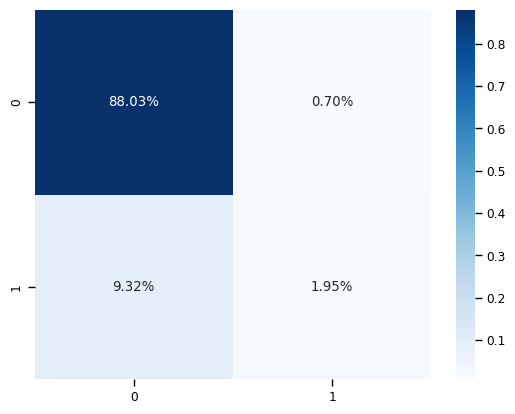

In [130]:

rf_eval = evaluate_model(rf,X_test,y_test)

print("Accuracy",rf_eval['acc'])
print("Precision",rf_eval['prec'])
print("Recall",rf_eval['rec'])
print("F1",rf_eval['f1'])
print("AUC",rf_eval['auc'])
print("Confusion Matrix",rf_eval['cm'])

Accuracy 0.8991083509697116
Precision 0.7159235668789808
Recall 0.1730828457037265
F1 0.2787698412698413
AUC 0.799109496564717
Confusion Matrix [[25353   223]
 [ 2685   562]]


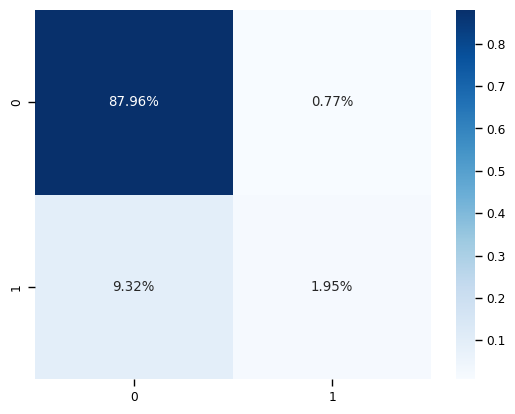

In [131]:
rf_eval_train = evaluate_model(rf,X_train,y_train)

print("Accuracy",rf_eval_train['acc'])
print("Precision",rf_eval_train['prec'])
print("Recall",rf_eval_train['rec'])
print("F1",rf_eval_train['f1'])
print("AUC",rf_eval_train['auc'])
print("Confusion Matrix",rf_eval_train['cm'])

Text(0.5, 1.0, 'Global Feature Importance - Built-in Method')

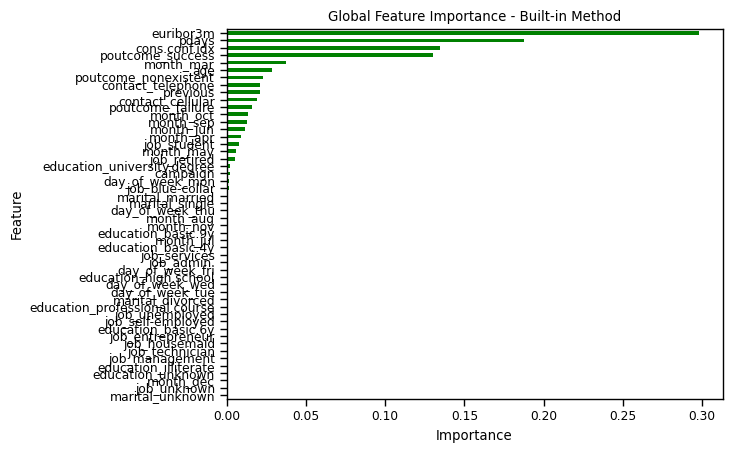

In [133]:
global_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
global_importances.sort_values(ascending=True, inplace=True)
global_importances.plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Global Feature Importance - Built-in Method")

In [134]:
global_importances

marital_unknown                  0.000000e+00
job_unknown                      0.000000e+00
month_dec                        0.000000e+00
education_unknown                0.000000e+00
education_illiterate             0.000000e+00
job_management                   8.366252e-08
job_technician                   7.487135e-06
job_housemaid                    1.646600e-05
job_entrepreneur                 1.825569e-05
education_basic.6y               1.830906e-05
job_self-employed                2.609758e-05
job_unemployed                   7.538756e-05
education_professional.course    1.363270e-04
marital_divorced                 1.408670e-04
day_of_week_tue                  1.591675e-04
day_of_week_wed                  1.828575e-04
education_high.school            2.618442e-04
day_of_week_fri                  4.241838e-04
job_admin.                       4.804959e-04
job_services                     4.855111e-04
education_basic.4y               5.727908e-04
month_jul                        6

In [ ]:
# Dropping features with less than 1% signifinace 

In [135]:
X_train_drop = X_train.drop(['month_dec','job_unknown','education_illiterate',
                        'marital_unknown','job_housemaid','job_technician',
                        'job_unemployed','education_basic.6y','job_management',
                        'job_entrepreneur','job_self-employed','education_unknown',
                         'marital_divorced','job_services','education_professional.course',
                         'month_jul','day_of_week_wed','day_of_week_tue',
                         'education_high.school','education_basic.4y','education_basic.9y',
                         'day_of_week_thu','day_of_week_fri','month_nov',
                         'marital_married','job_admin.','campaign',
                         'education_university.degree','day_of_week_mon','marital_single',
                         'month_aug','job_retired','job_student'],axis =1)

In [136]:
X_test_drop = X_test.drop(['month_dec','job_unknown','education_illiterate',
                        'marital_unknown','job_housemaid','job_technician',
                        'job_unemployed','education_basic.6y','job_management',
                        'job_entrepreneur','job_self-employed','education_unknown',
                         'marital_divorced','job_services','education_professional.course',
                         'month_jul','day_of_week_wed','day_of_week_tue',
                         'education_high.school','education_basic.4y','education_basic.9y',
                         'day_of_week_thu','day_of_week_fri','month_nov',
                         'marital_married','job_admin.','campaign',
                         'education_university.degree','day_of_week_mon','marital_single',
                         'month_aug','job_retired','job_student'],axis =1)

In [137]:
rf = RandomForestClassifier(n_estimators =50,min_samples_split=100,min_samples_leaf=100,max_features ='sqrt',max_depth =6)
rf.fit(X_train_drop,y_train)

C:\Users\ydhav\AppData\Local\Temp\ipykernel_27316\1032961465.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train_drop,y_train)


RandomForestClassifier(max_depth=6, min_samples_leaf=100, min_samples_split=100,
                       n_estimators=50)

Accuracy 0.89978142961224
Precision 0.7238372093023255
Recall 0.1788793103448276
F1 0.28686635944700456
AUC 0.7846301922594947
GINI 0.5692603845189894
Confusion Matrix [[10866    95]
 [ 1143   249]]


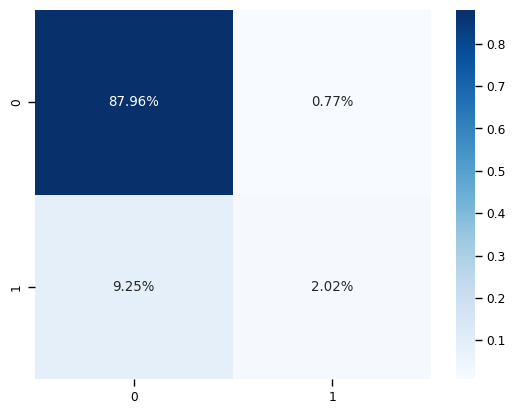

In [151]:
rf_eval = evaluate_model(rf,X_test_drop,y_test)

print("Accuracy",rf_eval['acc'])
print("Precision",rf_eval['prec'])
print("Recall",rf_eval['rec'])
print("F1",rf_eval['f1'])
print("AUC",rf_eval['auc'])
print("GINI",2*rf_eval['auc'] -1 )
print("Confusion Matrix",rf_eval['cm'])

Accuracy 0.8994206016028866
Precision 0.7121951219512195
Recall 0.17985833076686172
F1 0.2871895746250307
AUC 0.8004625055596182
GINI 0.6009250111192364
Confusion Matrix [[25340   236]
 [ 2663   584]]


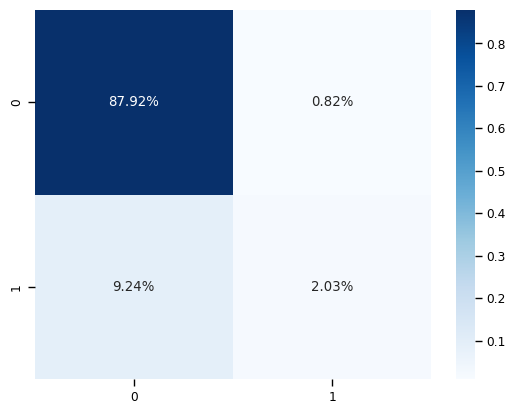

In [152]:
rf_eval_train = evaluate_model(rf,X_train_drop,y_train)

print("Accuracy",rf_eval_train['acc'])
print("Precision",rf_eval_train['prec'])
print("Recall",rf_eval_train['rec'])
print("F1",rf_eval_train['f1'])
print("AUC",rf_eval_train['auc'])
print("GINI",2*rf_eval_train['auc'] -1 )
print("Confusion Matrix",rf_eval_train['cm'])

Text(0.5, 1.0, 'Global Feature Importance - Built-in Method')

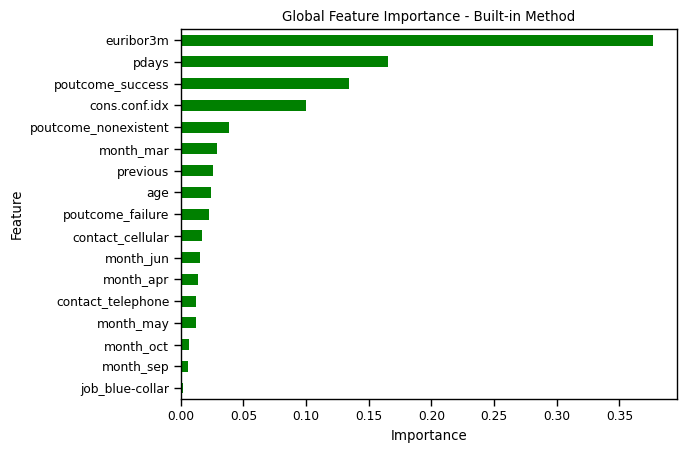

In [140]:
global_importances = pd.Series(rf.feature_importances_, index=X_train_drop.columns)
global_importances.sort_values(ascending=True, inplace=True)
global_importances.plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Global Feature Importance - Built-in Method")

In [141]:
global_importances

job_blue-collar         0.001515
month_sep               0.005429
month_oct               0.006620
month_may               0.011918
contact_telephone       0.012380
month_apr               0.013977
month_jun               0.015626
contact_cellular        0.016638
poutcome_failure        0.022660
age                     0.024271
previous                0.025730
month_mar               0.028510
poutcome_nonexistent    0.038581
cons.conf.idx           0.099713
poutcome_success        0.134399
pdays                   0.165050
euribor3m               0.376984
dtype: float64

In [143]:
global_importances.to_excel("RF_varimp.xlsx",sheet_name='IV_sheet')

In [144]:
X_train_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28823 entries, 22708 to 34052
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   28823 non-null  float64
 1   pdays                 28823 non-null  float64
 2   previous              28823 non-null  float64
 3   cons.conf.idx         28823 non-null  float64
 4   euribor3m             28823 non-null  float64
 5   job_blue-collar       28823 non-null  uint8  
 6   contact_cellular      28823 non-null  uint8  
 7   contact_telephone     28823 non-null  uint8  
 8   month_apr             28823 non-null  uint8  
 9   month_jun             28823 non-null  uint8  
 10  month_mar             28823 non-null  uint8  
 11  month_may             28823 non-null  uint8  
 12  month_oct             28823 non-null  uint8  
 13  month_sep             28823 non-null  uint8  
 14  poutcome_failure      28823 non-null  uint8  
 15  poutcome_nonexi

In [145]:
num_cols

['age',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [146]:
cat_cols

['job', 'marital', 'education', 'contact', 'month', 'day_of_week', 'poutcome']

In [147]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28823 entries, 22708 to 34052
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             28823 non-null  int64  
 1   job             28823 non-null  object 
 2   marital         28823 non-null  object 
 3   education       28823 non-null  object 
 4   default         28823 non-null  object 
 5   housing         28823 non-null  object 
 6   loan            28823 non-null  object 
 7   contact         28823 non-null  object 
 8   month           28823 non-null  object 
 9   day_of_week     28823 non-null  object 
 10  campaign        28823 non-null  int64  
 11  pdays           28823 non-null  int64  
 12  previous        28823 non-null  int64  
 13  poutcome        28823 non-null  object 
 14  emp.var.rate    28823 non-null  float64
 15  cons.price.idx  28823 non-null  float64
 16  cons.conf.idx   28823 non-null  float64
 17  euribor3m       28823 non-n

In [148]:
var_imp_train = train[['euribor3m','pdays','poutcome','cons.conf.idx','month','previous','age','contact','job','y']]

In [149]:
var_imp_train

,euribor3m,pdays,poutcome,cons.conf.idx,month,previous,age,contact,job,y
22708,4.964,999,nonexistent,-36.1,aug,0,39,cellular,admin.,0
28573,1.415,999,nonexistent,-47.1,apr,0,21,cellular,admin.,0
9537,4.961,999,nonexistent,-41.8,jun,0,43,telephone,technician,0
8441,4.864,999,nonexistent,-41.8,jun,0,30,telephone,admin.,0
1358,4.855,999,nonexistent,-36.4,may,0,41,telephone,admin.,0
...,...,...,...,...,...,...,...,...,...,...
15812,4.960,999,nonexistent,-42.7,jul,0,56,cellular,housemaid,0
34049,1.281,999,failure,-46.2,may,1,34,cellular,admin.,0
3097,4.860,999,nonexistent,-36.4,may,0,60,telephone,unknown,0
26234,4.076,999,nonexistent,-42.0,nov,0,40,cellular,services,0


In [150]:
var_imp_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28823 entries, 22708 to 34052
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   euribor3m      28823 non-null  float64
 1   pdays          28823 non-null  int64  
 2   poutcome       28823 non-null  object 
 3   cons.conf.idx  28823 non-null  float64
 4   month          28823 non-null  object 
 5   previous       28823 non-null  int64  
 6   age            28823 non-null  int64  
 7   contact        28823 non-null  object 
 8   job            28823 non-null  object 
 9   y              28823 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 2.4+ MB
